In [3]:

import numpy as np
import matplotlib.pyplot as plt

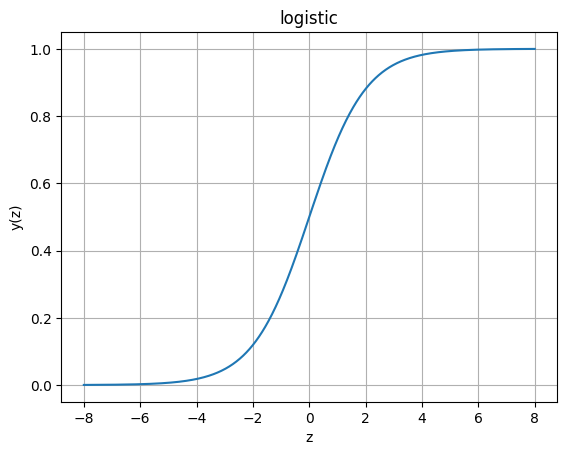

In [4]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

z = np.linspace(-8, 8, 1000)
y = sigmoid(z)
plt.plot(z, y)
plt.xlabel('z')
plt.ylabel('y(z)')
plt.title('logistic')
plt.grid()
plt.show()

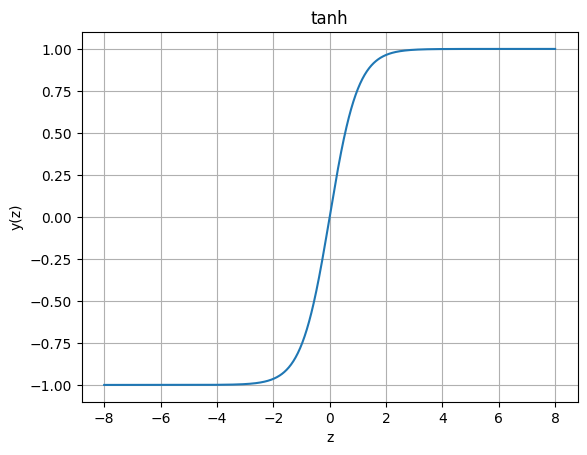

In [5]:
def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

z = np.linspace(-8, 8, 1000)
y = tanh(z)
plt.plot(z, y)
plt.xlabel('z')
plt.ylabel('y(z)')
plt.title('tanh')
plt.grid()
plt.show()

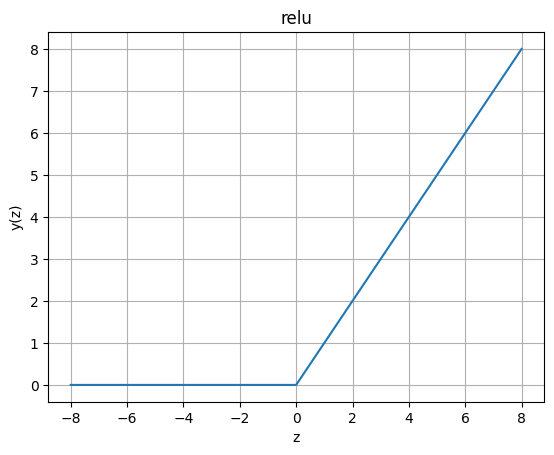

In [6]:
def relu(z):
    return np.maximum(np.zeros_like(z), z)


z = np.linspace(-8, 8, 1000)
y = relu(z)
plt.plot(z, y)
plt.xlabel('z')
plt.ylabel('y(z)')
plt.title('relu')
plt.grid()
plt.show()

## Building neural networks

In [7]:
def sigmoid_derivative(z):
    return sigmoid(z) * (1.0 - sigmoid(z))

In [8]:
def train(X, y, n_hidden, learning_rate, n_iter):
    m, n_input = X.shape
    W1 = np.random.randn(n_input, n_hidden)
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, 1)
    b2 = np.zeros((1, 1))
    for i in range(1, n_iter+1):
        Z2 = np.matmul(X, W1) + b1
        A2 = sigmoid(Z2)
        Z3 = np.matmul(A2, W2) + b2
        A3 = Z3

        dZ3 = A3 - y
        dW2 = np.matmul(A2.T, dZ3)
        db2 = np.sum(dZ3, axis=0, keepdims=True)

        dZ2 = np.matmul(dZ3, W2.T) * sigmoid_derivative(Z2)
        dW1 = np.matmul(X.T, dZ2)
        db1 = np.sum(dZ2, axis=0)

        W2 = W2 - learning_rate * dW2 / m
        b2 = b2 - learning_rate * db2 / m
        W1 = W1 - learning_rate * dW1 / m
        b1 = b1 - learning_rate * db1 / m

        if i % 100 == 0:
            cost = np.mean((y - A3) ** 2)
            print('Iteration %i, training loss: %f' % (i, cost))

    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

In [9]:
from sklearn import datasets
housing = datasets.fetch_california_housing()

num_test = 10  # the last 10 samples as testing set

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

X_train = housing.data[:-num_test, :]
X_train = scaler.fit_transform(X_train)
y_train = housing.target[:-num_test].reshape(-1, 1)
X_test = housing.data[-num_test:, :]
X_test = scaler.transform(X_test)
y_test = housing.target[-num_test:]


In [10]:
n_hidden = 20
learning_rate = 0.1
n_iter = 2000

model = train(X_train, y_train, n_hidden, learning_rate, n_iter)

Iteration 100, training loss: 0.671758
Iteration 200, training loss: 0.584885
Iteration 300, training loss: 0.542853
Iteration 400, training loss: 0.517572
Iteration 500, training loss: 0.500850
Iteration 600, training loss: 0.488765
Iteration 700, training loss: 0.479294
Iteration 800, training loss: 0.471380
Iteration 900, training loss: 0.464461
Iteration 1000, training loss: 0.458215
Iteration 1100, training loss: 0.452512
Iteration 1200, training loss: 0.447352
Iteration 1300, training loss: 0.442629
Iteration 1400, training loss: 0.438320
Iteration 1500, training loss: 0.434416
Iteration 1600, training loss: 0.430897
Iteration 1700, training loss: 0.427739
Iteration 1800, training loss: 0.424953
Iteration 1900, training loss: 0.422523
Iteration 2000, training loss: 0.420303


In [11]:
def predict(x, model):
    W1 = model['W1']
    b1 = model['b1']
    W2 = model['W2']
    b2 = model['b2']

    A2 = sigmoid(np.matmul(x, W1) + b1)
    A3 = np.matmul(A2, W2) + b2
    return A3

In [12]:
predictions = predict(X_test, model)
print(predictions[:, 0])
print(y_test)

[0.9997045  0.95691824 0.90036239 0.67884598 0.80388754 0.58979389
 0.90869268 0.77054242 0.98490441 0.72528942]
[1.12  1.072 1.156 0.983 1.168 0.781 0.771 0.923 0.847 0.894]


### Implementing neural networks with scikit-learn


In [13]:
from sklearn.neural_network import MLPRegressor

nn_scikit = MLPRegressor(hidden_layer_sizes=(16, 8),
                         activation='relu',
                         solver='adam',
                         learning_rate_init=0.001,
                         random_state=42,
                         max_iter=2000)

In [14]:
nn_scikit.fit(X_train, y_train.ravel())
predictions = nn_scikit.predict(X_test)

print(predictions)

[1.19968791 1.2725324  1.30448323 0.88688675 1.18623612 0.72605956
 0.87409406 0.85671201 0.93423154 0.94196305]


In [15]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, predictions))

0.010613171947751705


### Implementing neural networks with TensorFlow

In [16]:
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)

In [17]:
model = keras.Sequential([
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=8, activation='relu'),
    keras.layers.Dense(units=1)
])

In [18]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.01))

In [20]:
model.fit(X_train, y_train, epochs=100)


Epoch 1/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3692
Epoch 2/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3623
Epoch 3/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3920
Epoch 4/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3554
Epoch 5/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3607
Epoch 6/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3452
Epoch 7/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3418
Epoch 8/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3386
Epoch 9/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3357
Epoch 10/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3336
Epoch 11/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3315
Epoch 12/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3289
Epoch 13/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3268
Epoch 14/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3268
Epoch 15/100
645/645 ━━━━━━━━━━━━━━━━━━━━ 3

In [21]:
predictions = model.predict(X_test)[:, 0]
print(predictions)

print(mean_squared_error(y_test, predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
[1.3023107  1.3239367  1.3181968  0.9322702  1.2592185  0.75715137
 0.9012032  0.954723   1.0187173  0.996052  ]
0.019234083074803905


### Implementing neural networks with PyTorch

In [22]:
import torch
import torch.nn as nn

In [23]:
torch.manual_seed(42)
model = nn.Sequential(nn.Linear(X_train.shape[1], 16),
                      nn.ReLU(),
                      nn.Linear(16, 8),
                      nn.ReLU(),
                      nn.Linear(8, 1))


In [24]:
loss_function = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [25]:
X_train_torch = torch.from_numpy(X_train.astype(np.float32))
y_train_torch = torch.from_numpy(y_train.astype(np.float32))

In [26]:
def train_step(model, X_train, y_train, loss_function, optimizer):
    pred_train = model(X_train)
    loss = loss_function(pred_train, y_train)

    model.zero_grad()
    loss.backward()

    optimizer.step()

    return loss.item()

In [27]:
for epoch in range(500):
    loss = train_step(model, X_train_torch, y_train_torch, loss_function, optimizer)

    if epoch % 100 == 0:
        print(f"Epoch {epoch} - loss: {loss}")

Epoch 0 - loss: 4.908532619476318
Epoch 100 - loss: 0.500281572341919
Epoch 200 - loss: 0.40817755460739136
Epoch 300 - loss: 0.38704609870910645
Epoch 400 - loss: 0.37210220098495483


In [28]:
X_test_torch = torch.from_numpy(X_test.astype(np.float32))
predictions = model(X_test_torch).detach().numpy()[:, 0]
print(predictions)

print(mean_squared_error(y_test, predictions))

[1.1705055  1.1289219  1.1045765  0.86214024 1.0936521  0.6723797
 0.8856879  0.8008221  0.85238093 0.87555873]
0.006881814046228431


### Preventing overfitting in neural networks

**Dropout**

In [29]:
torch.manual_seed(42)
model_with_dropout = nn.Sequential(nn.Linear(X_train.shape[1], 16),
                                   nn.ReLU(),
                                   nn.Dropout(0.1),
                                   nn.Linear(16, 8),
                                   nn.ReLU(),
                                   nn.Linear(8, 1))

In [30]:
optimizer = torch.optim.Adam(model_with_dropout.parameters(), lr=0.01)


In [31]:
for epoch in range(1000):
    loss = train_step(model_with_dropout, X_train_torch, y_train_torch, loss_function, optimizer)

    if epoch % 100 == 0:
        print(f"Epoch {epoch} - loss: {loss}")

Epoch 0 - loss: 4.921249866485596
Epoch 100 - loss: 0.5313398838043213
Epoch 200 - loss: 0.44580134749412537
Epoch 300 - loss: 0.42642778158187866
Epoch 400 - loss: 0.4084305465221405
Epoch 500 - loss: 0.3638620376586914
Epoch 600 - loss: 0.35657209157943726
Epoch 700 - loss: 0.34948065876960754
Epoch 800 - loss: 0.3330667316913605
Epoch 900 - loss: 0.3198361098766327


In [32]:
model_with_dropout.eval()
predictions = model_with_dropout(X_test_torch).detach().numpy()[:, 0]

print(mean_squared_error(y_test, predictions))

0.008032211374527495


In [34]:
# Early stopping

torch.manual_seed(42)
model = nn.Sequential(nn.Linear(X_train.shape[1], 16),
                      nn.ReLU(),
                      nn.Linear(16, 8),
                      nn.ReLU(),
                      nn.Linear(8, 1))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [35]:

patience = 100
epochs_no_improve = 0
best_test_loss = float('inf')


In [36]:
import copy

best_model = model

for epoch in range(500):
    loss = train_step(model, X_train_torch, y_train_torch, loss_function, optimizer)

    predictions = model(X_test_torch).detach().numpy()[:, 0]
    test_loss = mean_squared_error(y_test, predictions)
    if test_loss > best_test_loss:
        epochs_no_improve += 1
        if epochs_no_improve > patience:
            print(f"Early stopped at epoch {epoch}")
            break
    else:
        epochs_no_improve = 0
        best_test_loss = test_loss
        best_model = copy.deepcopy(model)

Early stopped at epoch 224


In [37]:
predictions = best_model(X_test_torch).detach().numpy()[:, 0]

print(mean_squared_error(y_test, predictions))

0.005459466699832284
